In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

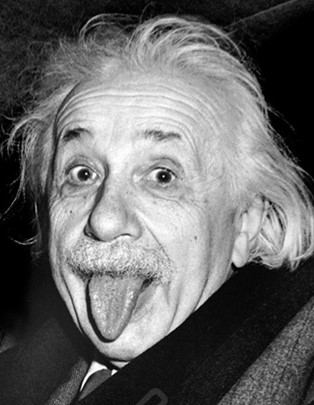

In [2]:
ein = Image.open('./Resources/einstein.jpg')
ein

In [3]:
type(ein)

PIL.JpegImagePlugin.JpegImageFile

In [4]:
np.shape(ein)

(405, 314, 3)

In [5]:
ein = np.mean(ein, 2)
ein.shape

(405, 314)

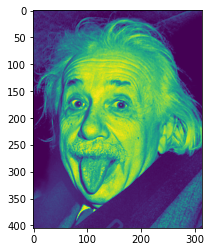

In [6]:
plt.imshow(ein);

In [7]:
U, s, V = np.linalg.svd(ein)
U.shape, s.shape, V.shape

((405, 405), (314,), (314, 314))

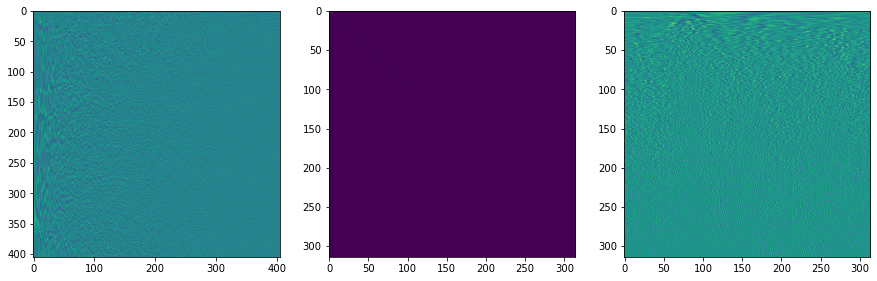

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
fig.fig_size =  (15, 5)
ax[0].imshow(U)
ax[1].imshow(np.diag(s))
ax[2].imshow(V)
plt.show()

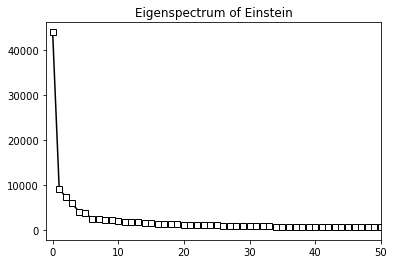

In [9]:
plt.plot(s, 'ks-', markerfacecolor='w')
plt.xlim([-1, 50])
plt.title('Eigenspectrum of Einstein');

So basically there is one feature which is super important and about 10 which are important, rest don't add too much value.

### Reconstruction

In [10]:
# S = np.diag(s) This won't work
S = np.zeros(ein.shape)
for i in range(s.shape[0]):
    S[i, i] = s[i]

In [11]:
full_reconstruction = U@S@V

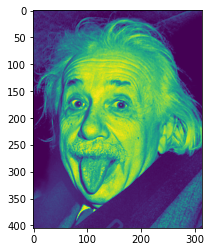

In [12]:
plt.imshow(full_reconstruction);

##### Randomizing the singular values

In [13]:
S = np.zeros(ein.shape)
random_order = np.random.permutation(s.shape[0])
for i in range(s.shape[0]):
    S[i, i] = s[random_order[i]]

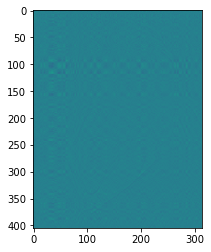

In [14]:
random_reconstruction = U@S@V
plt.imshow(random_reconstruction);

##### Top N Features

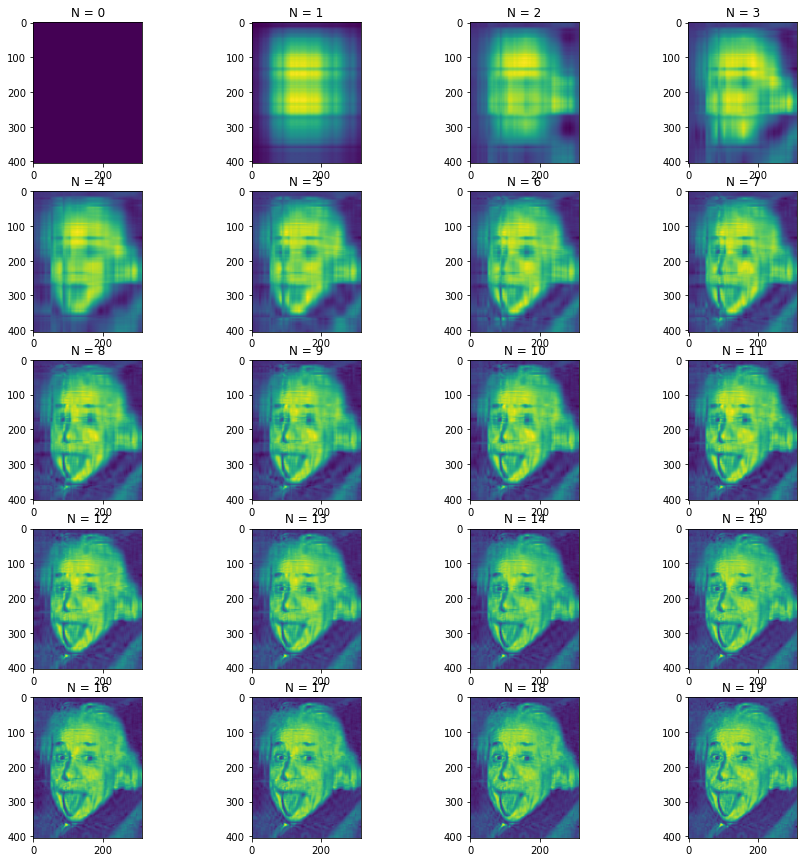

In [17]:
fig, axs = plt.subplots(5, 4, figsize=(15, 15));
for N in range(20):
    S = np.zeros(ein.shape)
    for i in range(N):
        S[i, i] = s[i]
    partial_reconstruction = U@S@V
    ax = axs[N // 4, N % 4]
    ax.imshow(partial_reconstruction)
    ax.set_title(f'N = {N}')
plt.show()

##### Let's check the last few features

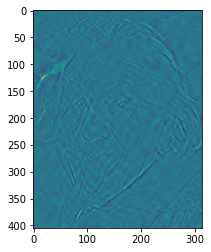

In [20]:
S = np.zeros(ein.shape)
for i in range(20, s.shape[0]):
    S[i, i] = s[i]
partial_reconstruction = U@S@V
plt.imshow(partial_reconstruction);

This captures the finer edges.